In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("ISEAR.csv", names=['SN','Class','Sentences'], index_col = 'SN')

In [3]:
data.head()

,Class,Sentences
SN,,
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [4]:
data.describe()

,Class,Sentences
count,7446,7446
unique,7,7379
top,joy,When my grandfather died.
freq,1082,8


In [5]:
data['Class'].unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt'],
      dtype=object)

### **Inference**
There are in total **7446** data entries in the dataset with **7 classes** namely:

**1) joy  
2) fear  
3) anger   
4) sadness  
5) disgust   
6) shame  
7) guilt**

The class joy has highest number of data (1082). The sentences all are not unique there is repititon of the sentences.

In [6]:
class_data = data.groupby('Class')

In [7]:
class_data.describe()

Sentences                                                            \
            count unique                                                top   
Class                                                                         
anger        1069   1069  My sister borrowed some LP records for a party...   
disgust      1059   1058  I saw a program on T.V where they had to saw a...   
fear         1063   1059                             First time in anatomy.   
guilt        1040   1039           I felt guilty when I lied to my parents.   
joy          1082   1071       Getting into this university to do medicine.   
sadness      1074   1046                          When my grandfather died.   
shame        1059   1049                       Not doing well in the examn.   

              
        freq  
Class         
anger      1  
disgust    2  
fear       2  
guilt      2  
joy        3  
sadness    8  
shame      5

### Inference
The number of data under each class is nearly equal hence the given ISEAR dataset is a balanced dataset.

## Missing values

In [8]:
data.isnull().any()

Class        False
Sentences    False
dtype: bool

### Inference
There are no missing values in the dataset

## Removing Punctuation and numbers

In [9]:
import re

In [10]:
def clean_text(text):
    return re.sub('[^A-Za-z]+', ' ', text)

In [11]:
data['Sentences'] = data['Sentences'].apply(clean_text)

## Tokenization

In [12]:
def tokenize(text):
    return re.findall("[\w']+", text)

In [13]:
data['Tokens'] = data['Sentences'].apply(tokenize)

In [14]:
data.head(10)

,Class,Sentences,Tokens
SN,,,
0,joy,On days when I feel close to my partner and ot...,"[On, days, when, I, feel, close, to, my, partn..."
1,fear,Every time I imagine that someone I love or I ...,"[Every, time, I, imagine, that, someone, I, lo..."
2,anger,When I had been obviously unjustly treated and...,"[When, I, had, been, obviously, unjustly, trea..."
3,sadness,When I think about the short time that we live...,"[When, I, think, about, the, short, time, that..."
4,disgust,At a gathering I found myself involuntarily si...,"[At, a, gathering, I, found, myself, involunta..."
5,shame,When I realized that I was directing the feeli...,"[When, I, realized, that, I, was, directing, t..."
6,guilt,I feel guilty when when I realize that I consi...,"[I, feel, guilty, when, when, I, realize, that..."
7,joy,After my girlfriend had taken her exam we went...,"[After, my, girlfriend, had, taken, her, exam,..."
8,fear,When for the first time I realized the meaning...,"[When, for, the, first, time, I, realized, the..."


In [15]:
data['Tokens'].iloc[0]

['On',
 'days',
 'when',
 'I',
 'feel',
 'close',
 'to',
 'my',
 'partner',
 'and',
 'other',
 'friends',
 'When',
 'I',
 'feel',
 'at',
 'peace',
 'with',
 'myself',
 'and',
 'also',
 'experience',
 'a',
 'close',
 'contact',
 'with',
 'people',
 'whom',
 'I',
 'regard',
 'greatly']

## Word Count analysis

In [16]:
data['word_count']= data['Tokens'].apply(lambda x: len(x))

In [17]:
data['word_count'].describe()

count    7446.000000
mean       22.073731
std        14.383814
min         1.000000
25%        12.000000
50%        19.000000
75%        29.750000
max       179.000000
Name: word_count, dtype: float64

In [18]:
data['word_count'].value_counts()[:10]

13    302
12    283
11    264
14    262
9     260
10    259
16    251
18    241
15    240
7     228
Name: word_count, dtype: int64

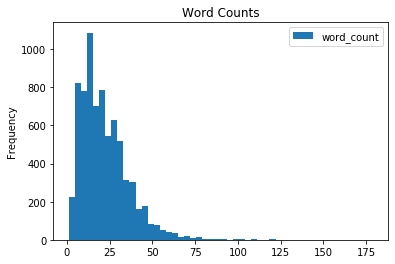

In [19]:
data.plot.hist(bins=50, title='Word Counts')

### **Inference**
In average there are **22 words** in each sample of data. With max number of words being **179** and minimum being **1**.

Occurance of word count = **13** is maximum in **302 samples**

## Normalizaton

In [20]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.stem import PorterStemmer

def lower_case(x):
    tokens_lower = []
    for token in x:
        token = token.lower()
        tokens_lower.append(token)
        
    return tokens_lower

In [22]:
data['Tokens'] = data['Tokens'].apply(lower_case)

In [23]:
data.head()

,Class,Sentences,Tokens,word_count
SN,,,,
0,joy,On days when I feel close to my partner and ot...,"[on, days, when, i, feel, close, to, my, partn...",31
1,fear,Every time I imagine that someone I love or I ...,"[every, time, i, imagine, that, someone, i, lo...",17
2,anger,When I had been obviously unjustly treated and...,"[when, i, had, been, obviously, unjustly, trea...",14
3,sadness,When I think about the short time that we live...,"[when, i, think, about, the, short, time, that...",30
4,disgust,At a gathering I found myself involuntarily si...,"[at, a, gathering, i, found, myself, involunta...",22


In [24]:
data['Tokens'].describe()

count                              7446
unique                             7376
top       [when, my, grandfather, died]
freq                                  8
Name: Tokens, dtype: object

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
def lemmanize(x):
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(token, pos='v') for token in x]
    return tokens_lem

In [27]:
data['Tokens'] = data['Tokens'].apply(lemmanize)

In [28]:
data.head()

,Class,Sentences,Tokens,word_count
SN,,,,
0,joy,On days when I feel close to my partner and ot...,"[on, days, when, i, feel, close, to, my, partn...",31
1,fear,Every time I imagine that someone I love or I ...,"[every, time, i, imagine, that, someone, i, lo...",17
2,anger,When I had been obviously unjustly treated and...,"[when, i, have, be, obviously, unjustly, treat...",14
3,sadness,When I think about the short time that we live...,"[when, i, think, about, the, short, time, that...",30
4,disgust,At a gathering I found myself involuntarily si...,"[at, a, gather, i, find, myself, involuntarily...",22


In [29]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')

print(eng_stopwords[:15])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']


In [30]:
def stop_word_removal(x):
    tokens = []
    for token in x:
        if token not in eng_stopwords:
            tokens.append(token)
    return tokens

In [31]:
data['Tokens'] = data['Tokens'].apply(stop_word_removal)

In [32]:
data.head()

,Class,Sentences,Tokens,word_count
SN,,,,
0,joy,On days when I feel close to my partner and ot...,"[days, feel, close, partner, friends, feel, pe...",31
1,fear,Every time I imagine that someone I love or I ...,"[every, time, imagine, someone, love, could, c...",17
2,anger,When I had been obviously unjustly treated and...,"[obviously, unjustly, treat, possibility, eluc...",14
3,sadness,When I think about the short time that we live...,"[think, short, time, live, relate, periods, li...",30
4,disgust,At a gathering I found myself involuntarily si...,"[gather, find, involuntarily, sit, next, two, ...",22


In [33]:
data['word_count']= data['Tokens'].apply(lambda x: len(x))

In [34]:
data['word_count'].describe()

count    7446.000000
mean        9.698630
std         6.134093
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
max        78.000000
Name: word_count, dtype: float64

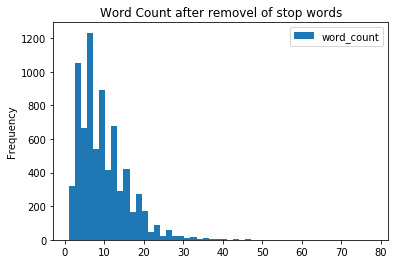

In [35]:
data.plot.hist(bins=50, title='Word Count after removel of stop words')

### Inference
After the removal of stop words the mean word count has been decread to **10 from 22** words. Also the max word count has been reduced to **81**. The change in the histogram can been seen

In [36]:
class_data = data.groupby('Class')

Class
anger      AxesSubplot(0.125,0.125;0.775x0.755)
disgust    AxesSubplot(0.125,0.125;0.775x0.755)
fear       AxesSubplot(0.125,0.125;0.775x0.755)
guilt      AxesSubplot(0.125,0.125;0.775x0.755)
joy        AxesSubplot(0.125,0.125;0.775x0.755)
sadness    AxesSubplot(0.125,0.125;0.775x0.755)
shame      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

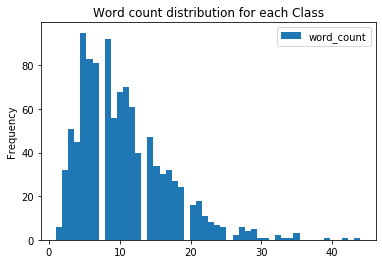

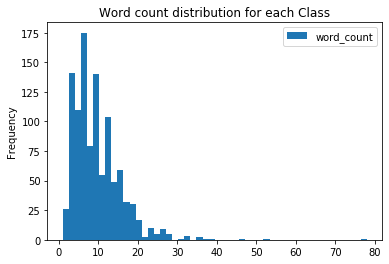

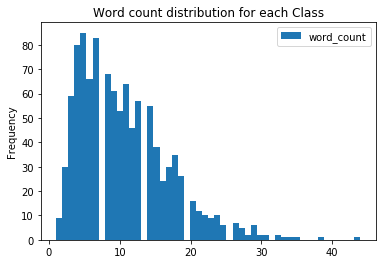

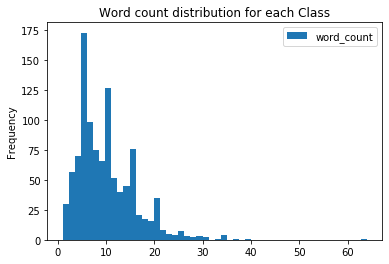

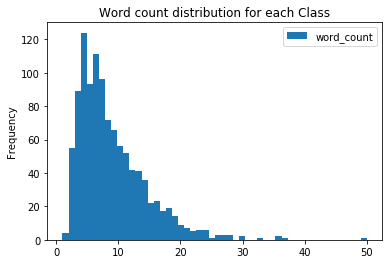

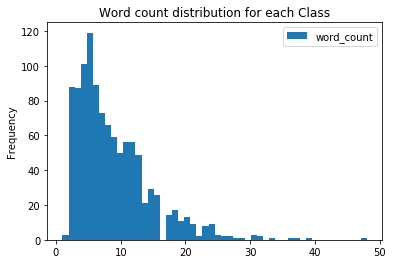

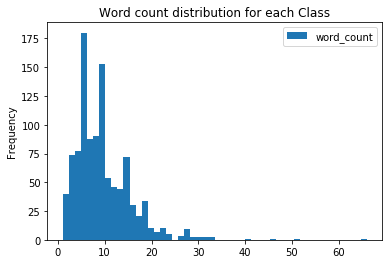

In [37]:
class_data.plot.hist(bins=50, title='Word count distribution for each Class')

### **Inference**
We can see that distribution of word counts for different classes. The distribution is almost similar for all classes having similar to normal distribution

In [38]:
data['Cleaned'] = data['Tokens'].apply(lambda x:" ".join(x))

In [39]:
data.head()

,Class,Sentences,Tokens,word_count,Cleaned
SN,,,,,
0,joy,On days when I feel close to my partner and ot...,"[days, feel, close, partner, friends, feel, pe...",14,days feel close partner friends feel peace als...
1,fear,Every time I imagine that someone I love or I ...,"[every, time, imagine, someone, love, could, c...",11,every time imagine someone love could contact ...
2,anger,When I had been obviously unjustly treated and...,"[obviously, unjustly, treat, possibility, eluc...",5,obviously unjustly treat possibility elucidate
3,sadness,When I think about the short time that we live...,"[think, short, time, live, relate, periods, li...",11,think short time live relate periods life thin...
4,disgust,At a gathering I found myself involuntarily si...,"[gather, find, involuntarily, sit, next, two, ...",12,gather find involuntarily sit next two people ...


## Feature Extraction (Vectorization)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Cleaned'])
type(X)

scipy.sparse.csr.csr_matrix

In [63]:
word_vec= pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [64]:
word_vec.shape

(7446, 6811)

In [65]:
word_vec.head()

,aa,abandon,abdomen,abdominal,abhor,abhorrent,abilities,ability,able,abnormal,...,zero,zesco,zhu,zig,zip,zipper,zomba,zombies,zone,zoophiliac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
word_vec.tail()

,aa,abandon,abdomen,abdominal,abhor,abhorrent,abilities,ability,able,abnormal,...,zero,zesco,zhu,zig,zip,zipper,zomba,zombies,zone,zoophiliac
7441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
sum_words = word_vec.sum(axis=0)

In [68]:
sum_words[150:160]

aggressions       1
aggressive        9
aggressively      2
aggrssion         1
agitation         1
ago             107
agreable          1
agree            28
agreement         5
agreements        1
dtype: int64

In [69]:
sum_words.describe()

count    6811.000000
mean       10.565849
std        40.545693
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       960.000000
dtype: float64

In [70]:
sum_words[sum_words>800]

felt      878
friend    960
go        892
dtype: int64

In [71]:
sum_words[sum_words<2]

abdomen       1
abhor         1
abhorrent     1
abominable    1
aboriginal    1
             ..
zipper        1
zomba         1
zombies       1
zone          1
zoophiliac    1
Length: 3268, dtype: int64

### Inference
We can see that in average same word occurs **13** times through out the dataset. The most common word is **friend** with frequency **960**. There are **3268 unique words** that occurs only once throughout the dataset

In [72]:
sum_words = sum_words.sort_values(ascending = False)

In [73]:
sum_words[:20]

friend     960
go         892
felt       878
get        751
one        695
time       631
tell       536
come       497
mother     421
make       420
feel       413
home       405
friends    389
would      374
day        372
find       368
take       362
know       361
school     357
people     354
dtype: int64

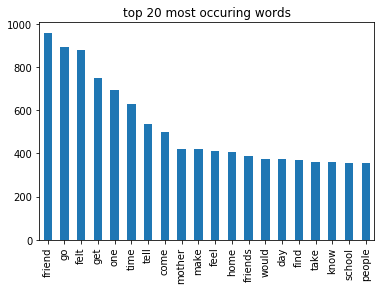

In [74]:
sum_words[:20].plot.bar(title = 'top 20 most occuring words')

## Bigram Analysis

In [78]:
bivectorizer = CountVectorizer(ngram_range=(2,2))
Bigram = bivectorizer.fit_transform(data['Cleaned'])
type(Bigram)

scipy.sparse.csr.csr_matrix

In [79]:
bigram_word_vec= pd.DataFrame(Bigram.toarray(), columns=bivectorizer.get_feature_names())
print(bigram_word_vec.shape)

(7446, 47947)


In [80]:
bigram_word_vec.head()

,aa bookshop,aa yesterday,abandon military,abandon puppies,abdomen tell,abdominal cramp,abdominal pain,abhor rudness,abilities attitudes,abilities exam,...,zemba traditional,zero oxygen,zero test,zesco full,zhu jianhau,zig zagging,zip rush,zipper open,zone shoot,zoophiliac rap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
bi_sum_words = bigram_word_vec.sum(axis=0)

In [82]:
bi_sum_words.describe()

count    47947.000000
mean         1.345611
std          2.158653
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        173.000000
dtype: float64

In [83]:
bi_sum_words[bi_sum_words>100]

felt guilty    134
friend mine    173
one day        132
dtype: int64

In [84]:
bi_sum_words=bi_sum_words.sort_values(ascending=False)

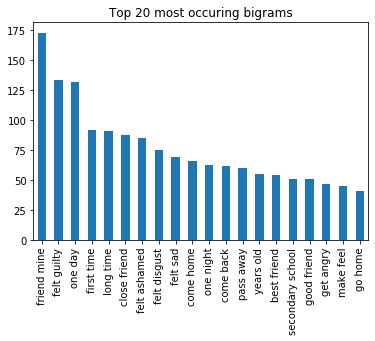

In [85]:
bi_sum_words[:20].plot.bar(title='Top 20 most occuring bigrams')

### Inference
The most occuring bigram is **friend mine** with frequency of **173**

## Analysis of Unigram and Bigram for each class

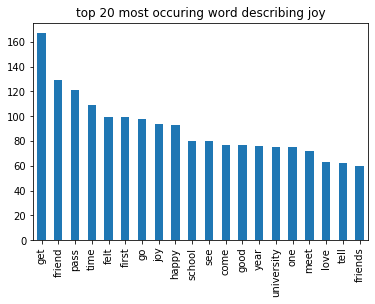

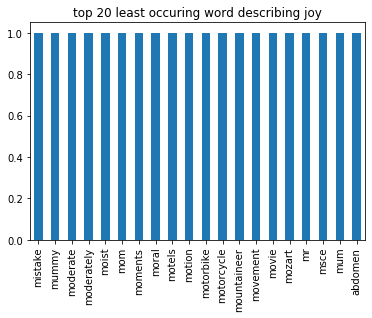

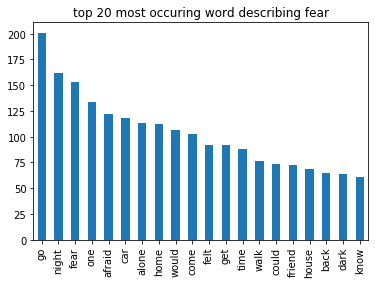

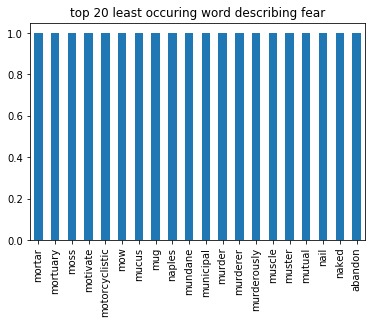

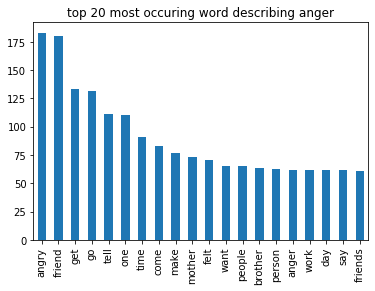

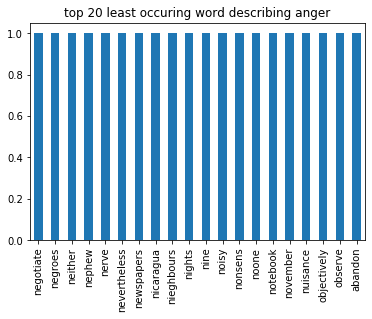

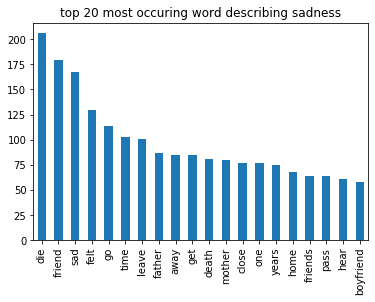

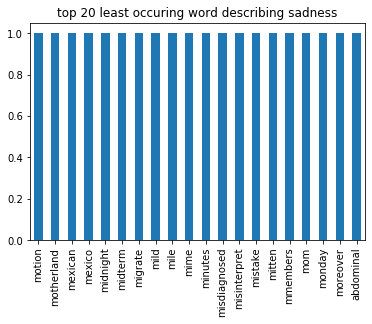

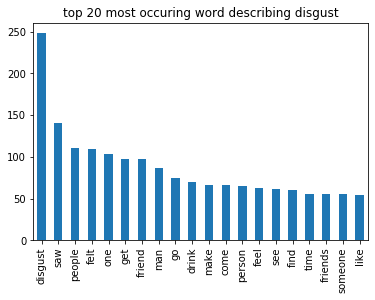

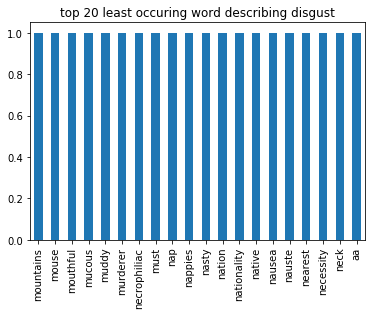

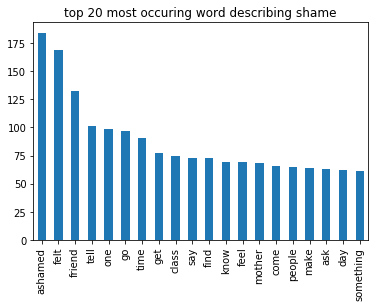

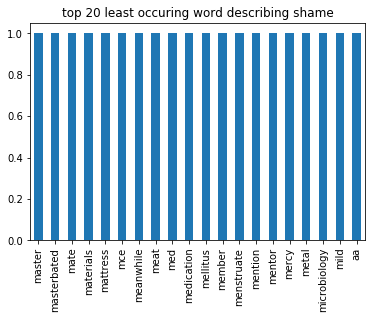

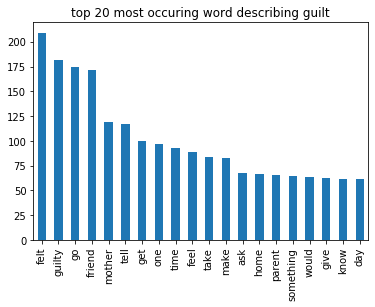

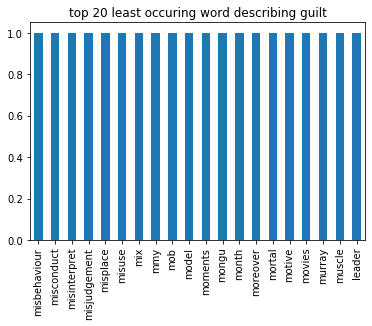

In [87]:
for i in data['Class'].unique():
    emotion = class_data.get_group(i)
    emotion_X = vectorizer.fit_transform(emotion['Cleaned'])
    emotion_word_vec= pd.DataFrame(emotion_X.toarray(), columns=vectorizer.get_feature_names())

    emotion_sum_words = emotion_word_vec.sum(axis=0)
    emotion_sum_words = emotion_sum_words.sort_values(ascending = False)

    emotion_sum_words[:20].plot.bar(title="top 20 most occuring word describing "+i)
    plt.show()
    emotion_sum_words[-20:].plot.bar(title="top 20 least occuring word describing "+i)
    plt.show()

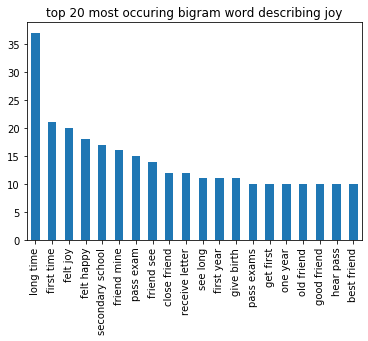

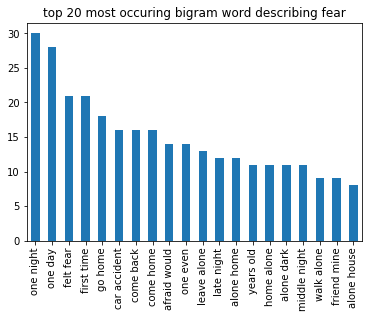

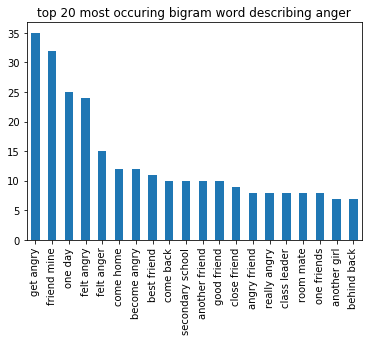

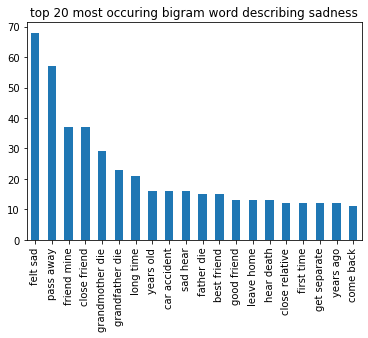

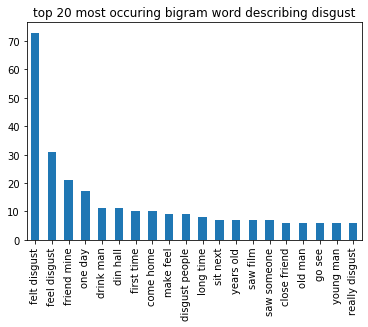

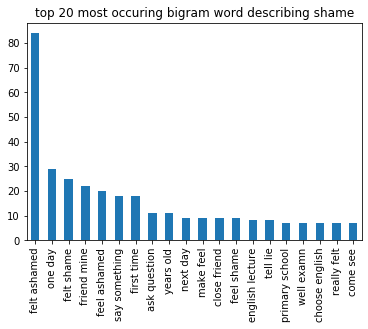

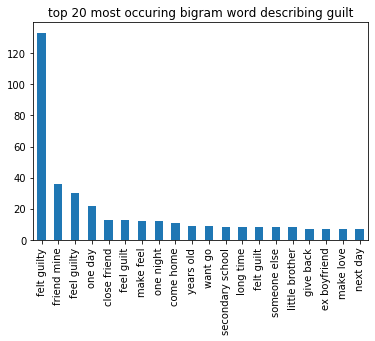

In [90]:
for i in data['Class'].unique():
    emotion = class_data.get_group(i)
    emotion_X = bivectorizer.fit_transform(emotion['Cleaned'])
    emotion_word_vec= pd.DataFrame(emotion_X.toarray(), columns=bivectorizer.get_feature_names())

    emotion_sum_words = emotion_word_vec.sum(axis=0)
    emotion_sum_words = emotion_sum_words.sort_values(ascending = False)

    emotion_sum_words[:20].plot.bar(title="top 20 most occuring bigram word describing "+i)
    plt.show()